In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [ ]:
data=pd.read_csv('/content/Environment_Temperature_change_E_All_Data_NOFLAG.csv',encoding='latin-1')

In [ ]:
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [ ]:
data.isna().sum().sum()

78103

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

#In This Dataset We Want To Predict The Temperature Change Per Year 

**So we only want year and temperature**

In [ ]:
def preprocessing(df):
  df=df.copy()
  df=df.query("Element == 'Temperature change'")
  df=df.groupby('Area').mean()
  df=df.loc[:,'Y1961':]
  df=pd.DataFrame(df.mean()).reset_index(drop=False)
  df.columns=['date','temp']
  
  return df

In [ ]:
time_series=preprocessing(data)

In [ ]:
time_series

,date,temp
0,Y1961,0.143032
1,Y1962,-0.028398
2,Y1963,-0.026297
3,Y1964,-0.122865
4,Y1965,-0.224154
5,Y1966,0.095070
6,Y1967,-0.131975
7,Y1968,-0.167841
8,Y1969,0.105694
9,Y1970,0.072189


**Now i am going to create a proper year column so that will also help us to predict in future**

In [ ]:
year=pd.date_range(start=pd.datetime(1961,1,1),periods=59,freq='A')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
year

DatetimeIndex(['1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
               '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31',
               '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31',
               '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
      

In [ ]:
time_series['year']=year

In [ ]:
time_series

,date,temp,year
0,Y1961,0.143032,1961-12-31
1,Y1962,-0.028398,1962-12-31
2,Y1963,-0.026297,1963-12-31
3,Y1964,-0.122865,1964-12-31
4,Y1965,-0.224154,1965-12-31
5,Y1966,0.095070,1966-12-31
6,Y1967,-0.131975,1967-12-31
7,Y1968,-0.167841,1968-12-31
8,Y1969,0.105694,1969-12-31
9,Y1970,0.072189,1970-12-31


In [ ]:
time_series.drop('date',axis=1,inplace=True)

In [ ]:
time_series=time_series.set_index('year')

In [ ]:
time_series

,temp
year,
1961-12-31,0.143032
1962-12-31,-0.028398
1963-12-31,-0.026297
1964-12-31,-0.122865
1965-12-31,-0.224154
1966-12-31,0.095070
1967-12-31,-0.131975
1968-12-31,-0.167841
1969-12-31,0.105694


#Lets check our data is stationary or not

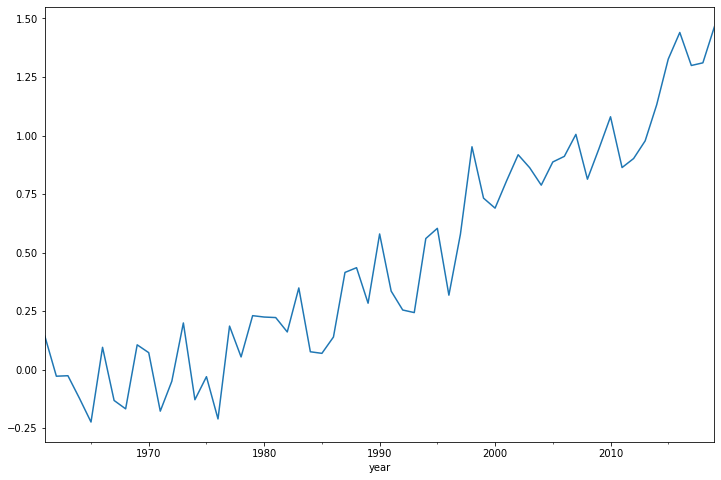

In [ ]:
time_series['temp'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test=adfuller(time_series['temp'])
print("P-Value-",test[1])

P-Value- 0.9943401651064641


**p value should be less then 0.05 lets make it stationary**

In [ ]:
time_series['difference']=time_series['temp']-time_series['temp'].shift(1)

In [ ]:
new_test=adfuller(time_series['difference'].dropna())
print('P-Value-',new_test[1])

P-Value- 1.8125804432308522e-11


**Now its looks perfect**

#Our Next Task Is To Find The Value Of P,Q,D so we do some plotting

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

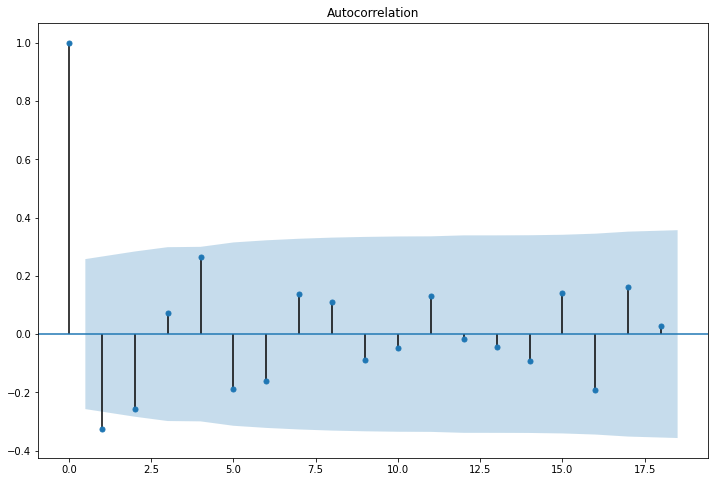

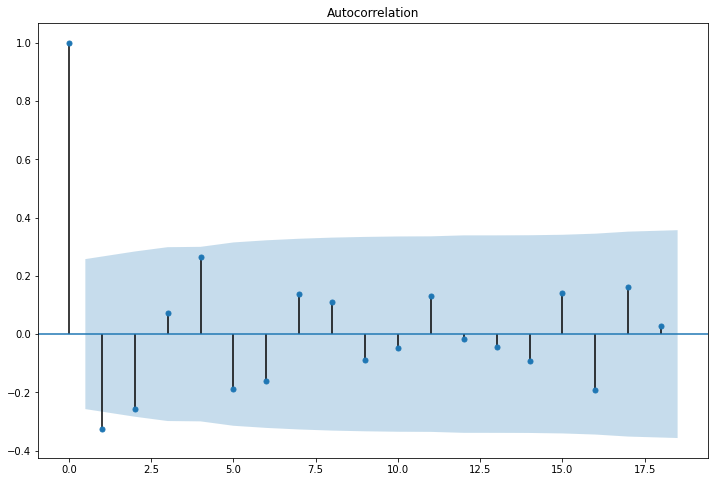

In [ ]:
plot_acf(time_series['difference'].dropna())

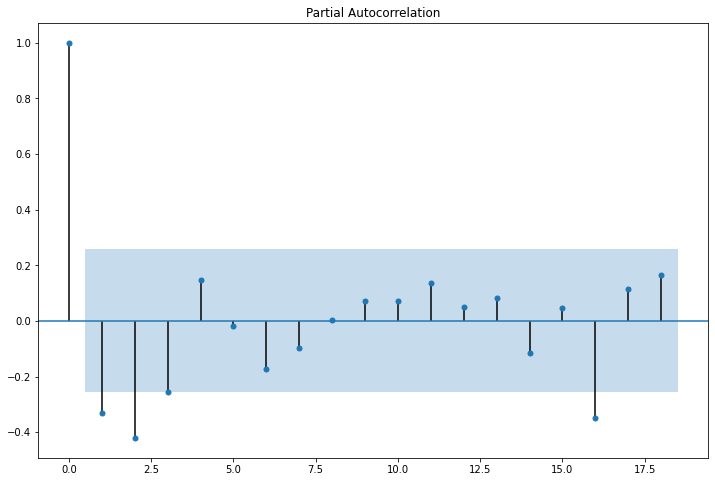

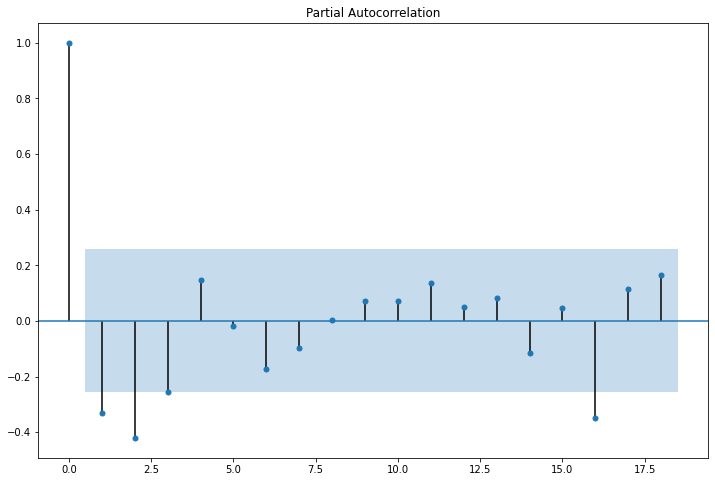

In [ ]:
plot_pacf(time_series['difference'].dropna())

#I will take p and q value 1

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(time_series['temp'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [ ]:
time_series['forecast']=model_fit.predict(start=40,end=58)

In [ ]:
time_series

,temp,difference,forecast
year,,,
1961-12-31,0.143032,NaN,NaN
1962-12-31,-0.028398,-0.171429,NaN
1963-12-31,-0.026297,0.002100,NaN
1964-12-31,-0.122865,-0.096568,NaN
1965-12-31,-0.224154,-0.101289,NaN
1966-12-31,0.095070,0.319224,NaN
1967-12-31,-0.131975,-0.227045,NaN
1968-12-31,-0.167841,-0.035866,NaN
1969-12-31,0.105694,0.273536,NaN


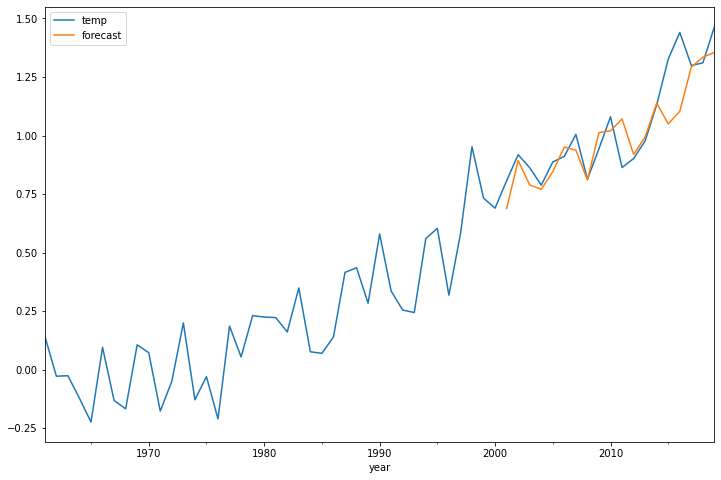

In [ ]:
time_series[['temp','forecast']].plot()

#lets predict for future

In [ ]:
future_dates=pd.date_range(start=pd.datetime(2019, 1, 1), periods=25, freq='A')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=time_series.columns)

In [ ]:
future_dates_df

,temp,difference,forecast
2020-12-31,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN
2022-12-31,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN
2024-12-31,NaN,NaN,NaN
2025-12-31,NaN,NaN,NaN
2026-12-31,NaN,NaN,NaN
2027-12-31,NaN,NaN,NaN
2028-12-31,NaN,NaN,NaN
2029-12-31,NaN,NaN,NaN


In [ ]:
future_dfs=pd.concat([time_series,future_dates_df])

In [ ]:
future_dfs

,temp,difference,forecast
1961-12-31,0.143032,NaN,NaN
1962-12-31,-0.028398,-0.171429,NaN
1963-12-31,-0.026297,0.002100,NaN
1964-12-31,-0.122865,-0.096568,NaN
1965-12-31,-0.224154,-0.101289,NaN
...,...,...,...
2039-12-31,NaN,NaN,NaN
2040-12-31,NaN,NaN,NaN
2041-12-31,NaN,NaN,NaN
2042-12-31,NaN,NaN,NaN


In [ ]:
future_dfs['forecast']=model_fit.predict(start=58,end=83)

In [ ]:
pd.set_option('max_row',None)

In [ ]:
future_dfs

,temp,difference,forecast
1961-12-31,0.143032,NaN,NaN
1962-12-31,-0.028398,-0.171429,NaN
1963-12-31,-0.026297,0.002100,NaN
1964-12-31,-0.122865,-0.096568,NaN
1965-12-31,-0.224154,-0.101289,NaN
1966-12-31,0.095070,0.319224,NaN
1967-12-31,-0.131975,-0.227045,NaN
1968-12-31,-0.167841,-0.035866,NaN
1969-12-31,0.105694,0.273536,NaN
1970-12-31,0.072189,-0.033506,NaN


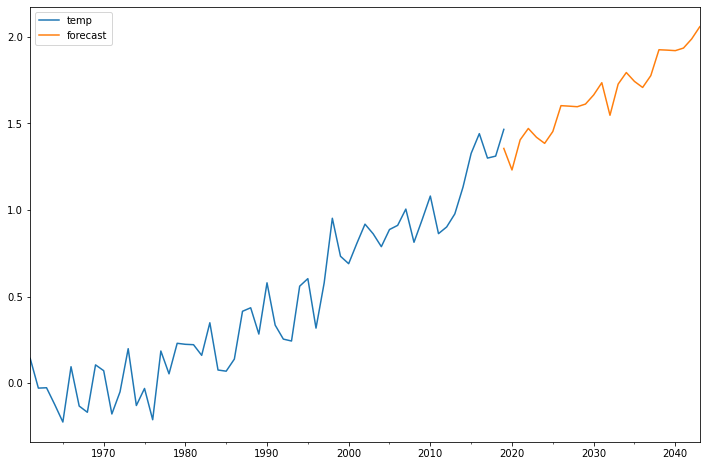

In [ ]:
future_dfs[['temp','forecast']].plot()

#Our models says Global Warming will increase lets see what will happen in future